In [1]:
# Load libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Read dataset
zoo = pd.read_csv("../data/extracted/Zoo/zoo.csv")
zoo

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


# Ojo: tipos de datos cuando se usa [ ] y cuando se usa [[ ]]

In [16]:
type(zoo["animal"])

pandas.core.series.Series

In [17]:
type(zoo[["animal"]])

pandas.core.frame.DataFrame

In [18]:
dir(zoo["animal"]) #me deja ver cuáles métodos se pueden llamar en el objeto de regreso

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

## Filter and count

In [4]:
zoo[["animal"]].count()

animal    22
dtype: int64

In [5]:
zoo.animal.count()

22

In [8]:
animalsList = list(zoo.animal)
animalsList

['elephant',
 'elephant',
 'elephant',
 'tiger',
 'tiger',
 'tiger',
 'tiger',
 'tiger',
 'zebra',
 'zebra',
 'zebra',
 'zebra',
 'zebra',
 'zebra',
 'zebra',
 'lion',
 'lion',
 'lion',
 'lion',
 'kangaroo',
 'kangaroo',
 'kangaroo']

In [9]:
animalsTypes = set(animalsList)
animalsTypes

{'elephant', 'kangaroo', 'lion', 'tiger', 'zebra'}

### More filtering and stats

In [11]:
waterNeeded = zoo.water_need
waterNeeded

0     500
1     600
2     550
3     300
4     320
5     330
6     290
7     310
8     200
9     220
10    240
11    230
12    220
13    100
14     80
15    420
16    600
17    500
18    390
19    410
20    430
21    410
Name: water_need, dtype: int64

In [12]:
waterNeeded.sum()

7650

In [13]:
waterNeeded.min()

80

In [19]:
waterNeeded.max()

600

In [20]:
waterNeeded.mean()

347.72727272727275

In [21]:
waterNeeded.median()

325.0

(array([1., 1., 0., 0., 0., 0., 0., 0., 1., 2., 1., 1., 0., 0., 1., 2., 1.,
        1., 0., 0., 0., 1., 2., 1., 1., 0., 0., 0., 0., 2., 0., 0., 1., 0.,
        0., 2.]),
 array([ 80.        ,  94.44444444, 108.88888889, 123.33333333,
        137.77777778, 152.22222222, 166.66666667, 181.11111111,
        195.55555556, 210.        , 224.44444444, 238.88888889,
        253.33333333, 267.77777778, 282.22222222, 296.66666667,
        311.11111111, 325.55555556, 340.        , 354.44444444,
        368.88888889, 383.33333333, 397.77777778, 412.22222222,
        426.66666667, 441.11111111, 455.55555556, 470.        ,
        484.44444444, 498.88888889, 513.33333333, 527.77777778,
        542.22222222, 556.66666667, 571.11111111, 585.55555556,
        600.        ]),
 <a list of 36 Patch objects>)

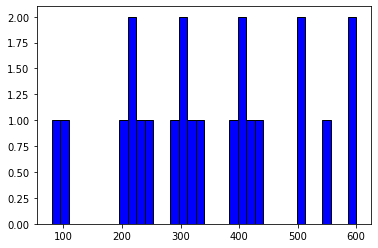

In [22]:
plt.hist(waterNeeded, color='blue', edgecolor='black', bins=int(180/5))

### Mixed filtering and plotting

In [23]:
waterGroupedMean = zoo.groupby("animal").mean()[["water_need"]]
waterGroupedMean

,water_need
animal,
elephant,550.000000
kangaroo,416.666667
lion,477.500000
tiger,310.000000
zebra,184.285714


In [24]:
zoo.groupby("animal").mean().water_need

animal
elephant    550.000000
kangaroo    416.666667
lion        477.500000
tiger       310.000000
zebra       184.285714
Name: water_need, dtype: float64

In [25]:
waterGroupedSum = zoo.groupby("animal").mean().water_need
waterGroupedSum

animal
elephant    550.000000
kangaroo    416.666667
lion        477.500000
tiger       310.000000
zebra       184.285714
Name: water_need, dtype: float64

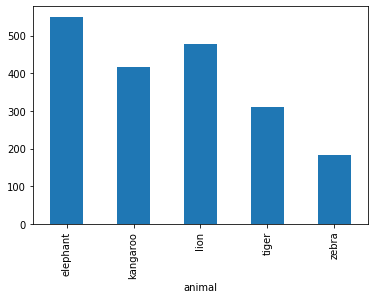

In [26]:
waterGroupedSum.plot.bar()

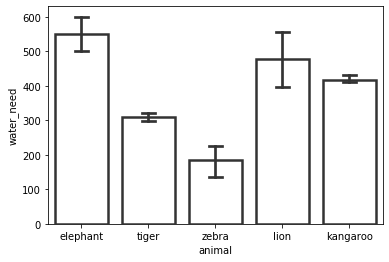

In [27]:
sns.barplot(
    x="animal", y="water_need", data=zoo,
    capsize=.2, linewidth=2.5, facecolor=(1, 1, 1, 0),
    errcolor=".2", edgecolor=".2"
)
plt.savefig('./images/zoo.png', dpi=500)